<a href="https://colab.research.google.com/github/vaniamusdani/vaniamusdani.github.io/blob/main/Case%20Study%20Korelasi%20dan%20Regresi%20Group%20B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GROUP B

1. Daffi Farhansyah/1906375833
2. Aditya Firmansyah/2006533143
3. M. Dzaky Jaya/1806193640
4. Rahmi Radhia/1906375796
5. Teguh Saputra/1906375700
6. Caroline Woenarso/1906375663
7. Vania Putri/1906377706



# Problem Statement



## Problem







Assessing the value of energy efficiency improvements can be challenging as there's no way to truly know how much energy a building would have used without the improvements. The best we can do is to build counterfactual models. Once a building is overhauled the new (lower) energy consumption is compared against modeled values for the original building to calculate the savings from the retrofit. More accurate models could support better market incentives and enable lower cost financing.

This case study challenges us to build these counterfactual models across four energy types based on historic usage rates and observed weather. The dataset includes three years of hourly meter readings from over one thousand buildings at several different sites around the world.

## Main Focus

Bagaimana meningkatkan efisiensi dalam penggunaan energi dari suatu bangunan? Baik untuk bangunan yang akan dibangun ke depannya, maupun bangunan yang sudah ada sekarang.






# Data Set

In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from itertools import combinations
from collections import Counter
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings

%matplotlib inline
plt.style.use('bmh'); sns.set()
warnings.filterwarnings('ignore')

# Import Data Set from GitHub
file_ = 'data/Ashrae_Energy_Mean.csv'
try: #Loading Locally
    df = pd.read_csv(file_)
except Exception as err_:
    print(err_, " Trying to load data from GitHub.")
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataid/eLearning/master/data/Ashrae_Energy_Mean.csv
    df = pd.read_csv(file_)

print(df.shape)
df.head()

(1413, 12)


,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


In [ ]:
df

,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
...,...,...,...,...,...,...,...,...,...,...,...,...
1408,7.484137,Entertainment/public assembly,19619,1914.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1409,4.732815,Education,4298,NaN,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1410,7.211347,Entertainment/public assembly,11265,1997.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1411,187.117994,Lodging/residential,29775,2001.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547


# Data Pre-Processing

Akan dilakukan data pre-processing guna mempersiapkan data agar dapat dilakukan analisis.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1413 non-null   float64
 1   primary_use         1413 non-null   object 
 2   square_feet         1413 non-null   int64  
 3   year_built          663 non-null    float64
 4   floor_count         352 non-null    float64
 5   air_temperature     1413 non-null   float64
 6   cloud_coverage      1396 non-null   float64
 7   dew_temperature     1413 non-null   float64
 8   precip_depth_1_hr   1237 non-null   float64
 9   sea_level_pressure  1324 non-null   float64
 10  wind_direction      1413 non-null   float64
 11  wind_speed          1413 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 132.6+ KB


In [ ]:
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
meter_reading,1413.0,NaN,NaN,NaN,185.383188,374.8995,0.0004,27.224943,74.933148,182.884848,5072.323426
primary_use,1413,16,Education,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
square_feet,1413.0,NaN,NaN,NaN,92204.79264,111412.340117,283.0,22949.0,57673.0,115288.0,875000.0
year_built,663.0,NaN,NaN,NaN,1968.170437,31.026539,1900.0,1949.5,1970.0,1995.5,2017.0
floor_count,352.0,NaN,NaN,NaN,3.738636,3.336731,1.0,1.0,3.0,5.0,26.0
air_temperature,1413.0,NaN,NaN,NaN,15.697154,5.416736,7.572136,11.058629,15.204244,21.325261,24.963702
cloud_coverage,1396.0,NaN,NaN,NaN,2.166618,1.461644,0.059266,0.665832,2.083712,2.998727,5.671785
dew_temperature,1413.0,NaN,NaN,NaN,8.259831,4.625295,-0.304675,4.512823,8.285693,9.834399,17.379328
precip_depth_1_hr,1237.0,NaN,NaN,NaN,1.18786,1.478667,0.155325,0.775686,0.89598,1.033215,11.675633
sea_level_pressure,1324.0,NaN,NaN,NaN,1016.46699,1.921973,1011.436563,1016.404579,1016.797495,1017.949437,1018.052063


In [ ]:
df.drop('floor_count',axis=1,inplace=True)
df.drop('year_built',axis=1,inplace=True)

In [ ]:
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
meter_reading,1413.0,NaN,NaN,NaN,185.383188,374.8995,0.0004,27.224943,74.933148,182.884848,5072.323426
primary_use,1413,16,Education,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
square_feet,1413.0,NaN,NaN,NaN,92204.79264,111412.340117,283.0,22949.0,57673.0,115288.0,875000.0
air_temperature,1413.0,NaN,NaN,NaN,15.697154,5.416736,7.572136,11.058629,15.204244,21.325261,24.963702
cloud_coverage,1396.0,NaN,NaN,NaN,2.166618,1.461644,0.059266,0.665832,2.083712,2.998727,5.671785
dew_temperature,1413.0,NaN,NaN,NaN,8.259831,4.625295,-0.304675,4.512823,8.285693,9.834399,17.379328
precip_depth_1_hr,1237.0,NaN,NaN,NaN,1.18786,1.478667,0.155325,0.775686,0.89598,1.033215,11.675633
sea_level_pressure,1324.0,NaN,NaN,NaN,1016.46699,1.921973,1011.436563,1016.404579,1016.797495,1017.949437,1018.052063
wind_direction,1413.0,NaN,NaN,NaN,175.351051,24.921236,123.388701,153.62943,184.295922,187.301104,207.134076
wind_speed,1413.0,NaN,NaN,NaN,3.564617,0.737746,2.157103,3.100911,3.619547,3.905433,5.493939


Pada tahap ini, variabel `floor_count` dan `year_built` dihilangkan (di-drop) dengan alasan kedua variabel tersebut memiliki jumlah *missing value* yang mencapai ~1/4 dan ~1/2 dari jumlah data.
Sedemikian sehingga data hanya memiliki 10 variabel, yakni `meter_reading`, `primary_use`, `square_feet`, `air_temperature`, `cloud_coverage`, `dew_temperature`, `precip_depth_1_hr`, `sea_level_pressure`, `wind_direction`, dan `wind_speed`.


In [ ]:
df_new = df.copy()

In [ ]:
print(df_new.isnull().sum())

meter_reading           0
primary_use             0
square_feet             0
air_temperature         0
cloud_coverage         17
dew_temperature         0
precip_depth_1_hr     176
sea_level_pressure     89
wind_direction          0
wind_speed              0
dtype: int64


Terlihat bahwa beberapa variabel, yakni variabel `cloud_coverage`, `precip_depth_1_hr`, dan `sea_level_pressure` masih terdapat *missing value*. Oleh karena itu, tim data analyst memutuskan untuk menghilangkan baris data yang memiliki *missing value*.

In [ ]:
# Drop Missing Values
df_new = df_new.dropna()

In [ ]:
#ukuran data sisa
df_new.shape

(1220, 10)

Sedemikian sehingga, data yang digunakan dalam analisis adalah `df_new` dengan jumlah data (baris) 1220 dan terdapat 10 variabel (kolom).

# Analisis (Notes for PT Ashrae Energy)

Akan dilakukan analisis dengan EDA dan regresi untuk mengidentifikasi cara meningkatkan efisiensi dalam penggunaan energi dari suatu bangunan.

## EDA

Akan dilakukan EDA terhadap data.
Pertama-tama akan melihat korelasi Pearson dari variabel-variabel yang terdapat pada data (`df_new`).

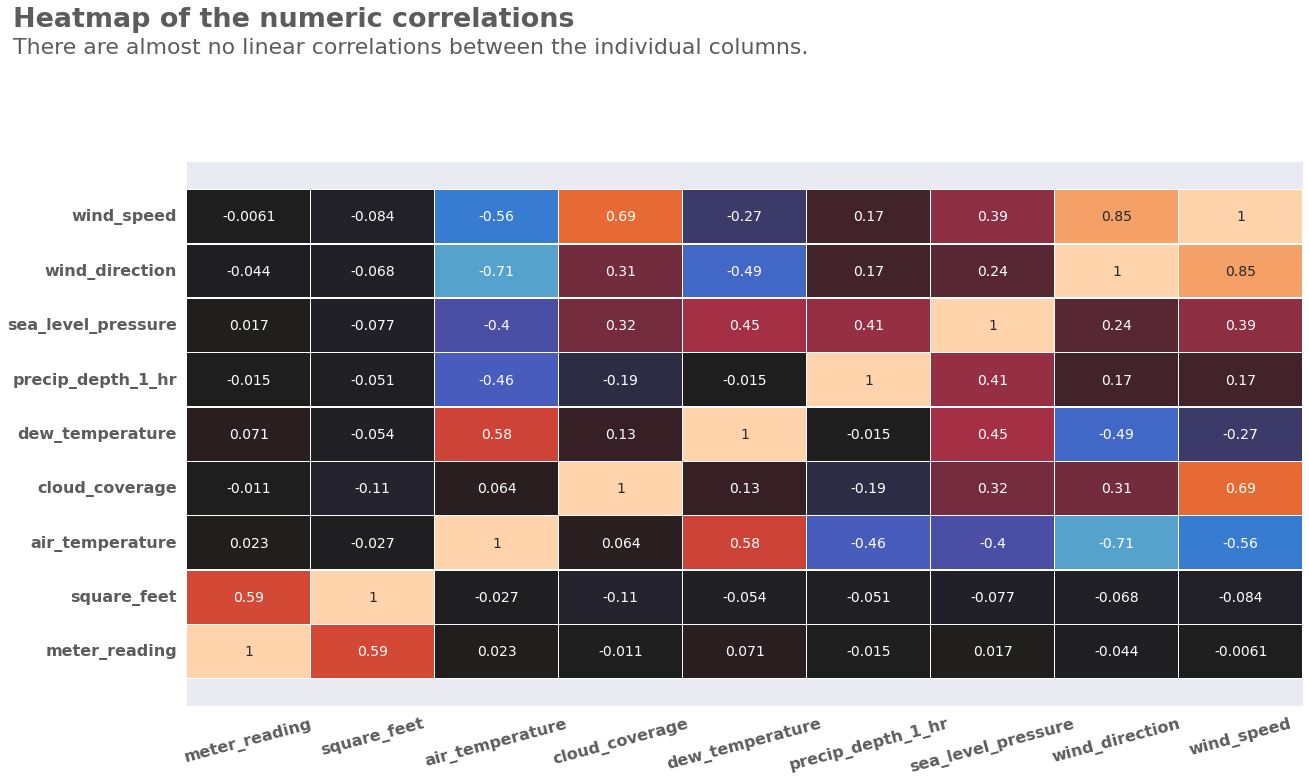

In [ ]:
df_heatmap =  df_new.select_dtypes("number")

test = df_heatmap.corr()

del df_heatmap

ax, fig = plt.subplots(figsize=(20,10))

ax = sns.heatmap(test,annot=True,annot_kws={"size": 14},linewidths=.5,center=0,cbar=False)

plt.xticks(rotation=15,weight="bold", fontsize=16, alpha=0.75)
plt.yticks(weight="bold", fontsize=16, alpha=0.75)

bottom, top = plt.ylim()
ax.set_ylim(top - 0.5 , bottom + 0.5)

#Title
plt.text(x=-1.4,y=12,s="Heatmap of the numeric correlations", weight="bold",alpha=0.75, fontsize=27)
plt.text(x=-1.4,y=11.5,s="There are almost no linear correlations between the individual columns.",alpha=0.75, fontsize=22)

plt.savefig("corr.png")

del test

Terlihat bahwa:

1.   Variabel `wind_speed` dan `wind_direction` memiliki korelasi positif yang relatif kuat (0.85).
2.   Variabel `wind_direction` dan `air_temperature` memiliki korelasi negatif yang relatif kuat (0.71).
3.   Variabel `wind_speed` dan `cloud_coverage`; `meter_reading` dan `square_feet`; serta `dew_temperature` dan `air_temperature` memiliki korelasi positif yang moderate. Di mana `wind_speed` dan `cloud_coverage` memiliki korelasi positif sebesar 0.69; `meter_reading` dan `square_feet` memiliki korelasi positif sebesar 0.59; serta `dew_temperature` dan `air_temperature` memiliki korelasi positif sebesar 0.58.
4.   Variabel `air_temperature` dan `wind_speed` memiliki korelasi negatif yang cukup, yakni sebesar 0.56.

Selanjutnya, akan dilihat banyaknya gedung berdasarkan variabel `primary_use` nya dengan menggunakan bar chart serta melihat gedung dengan `primary_use` apa yang paling banyak mengonsumsi energi.

Text(0.5, 1.05, 'Primary use')

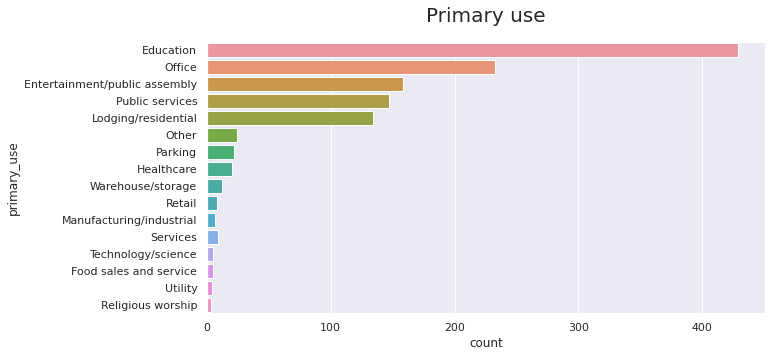

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(data=df_new, y='primary_use',order=df['primary_use'].value_counts().index)
#title

ax.set_title('Primary use', fontsize=20, y=1.05)

1. Terlihat bahwa sebagian besar (~50%) gedung merupakan gedung dengan tujuan penggunaan "Education."

2. Selain "Education", gedung-gedung pada data juga didominasi oleh gedung dengan tujuan penggunaan "Office", "Entertainment/public assembly", "Public services", dan "Lodging/residential".

In [ ]:
print(df_new[df_new['primary_use'] == 'Education'].meter_reading.mean())
print(df_new[df_new['primary_use'] == 'Entertainment/public assembly'].meter_reading.mean())
print(df_new[df_new['primary_use'] == 'Food sales and service'].meter_reading.mean())
print(df_new[df_new['primary_use'] == 'Healthcare'].meter_reading.mean())
print(df_new[df_new['primary_use'] == 'Lodging/residential'].meter_reading.mean())
print(df_new[df_new['primary_use'] == 'Manufacturing/industrial'].meter_reading.mean())
print(df_new[df_new['primary_use'] == 'Office'].meter_reading.mean())
print(df_new[df_new['primary_use'] == 'Other'].meter_reading.mean())
print(df_new[df_new['primary_use'] == 'Parking'].meter_reading.mean())
print(df_new[df_new['primary_use'] == 'Public services'].meter_reading.mean())
print(df_new[df_new['primary_use'] == 'Religious worship'].meter_reading.mean())
print(df_new[df_new['primary_use'] == 'Retail'].meter_reading.mean())
print(df_new[df_new['primary_use'] == 'Services'].meter_reading.mean())
print(df_new[df_new['primary_use'] == 'Technology/science'].meter_reading.mean())
print(df_new[df_new['primary_use'] == 'Utility'].meter_reading.mean())
print(df_new[df_new['primary_use'] == 'Warehouse/storage'].meter_reading.mean())

241.66105600435344
133.59090604320323
96.37252788407642
323.9366308708736
134.46538660742274
93.58331185257013
184.49093718161393
92.40635776163754
72.32607110068705
101.94881416678214
4.762341647880107
273.0866555658221
93.84649511602301
119.74834178734609
161.86833939494966
50.79686888229321


Terlihat bahwa gedung dengan `primary_use` "Education" selain paling banyak frekuensinya, juga mengonsumsi banyak energi dibandingkan gedung-gedung dengan `primary_use` lainnya. Hal ini expected mengingat sekolah, universitas, dan perpustakaan banyak mengonsumsi energi guna menunjang kegiatan belajar mengajar.
Kemudian gedung dengan `primary_use` "Healthcare" merupakan gedung yang mengonsumsi energi paling besar dibandingkan gedung-gedung lainnya.

Selain itu, terlihat bahwa sebagian besar gedung-gedung cenderung memiliki `meter_reading` yang relatif besar. Diasumsikan bahwa gedung-gedung dengan konsumsi energi besar masih menggunakan peralatan dan perlengkapan elektronik yang boros energi (contoh: lampu masih belum LED).

## Analisis Regresi

Akan dilakukan analisis regresi terhadap data untuk mengidentifikasi cara meningkatkan efisiensi dalam penggunaan energi dari suatu bangunan.

In [ ]:
df_reg=df_new.copy()

In [ ]:
#variabel 'primary_use'
set(df_reg['primary_use'])

{'Education',
 'Entertainment/public assembly',
 'Food sales and service',
 'Healthcare',
 'Lodging/residential',
 'Manufacturing/industrial',
 'Office',
 'Other',
 'Parking',
 'Public services',
 'Religious worship',
 'Retail',
 'Services',
 'Technology/science',
 'Utility',
 'Warehouse/storage'}

In [ ]:
df_reg.shape

(1220, 10)

In [ ]:
#normalisasi data
df_reg["meter_reading"] = (df_reg["meter_reading"] - df_reg["meter_reading"].mean()) / df_reg["meter_reading"].std()
df_reg["square_feet"] = (df_reg["square_feet"] - df_reg["square_feet"].mean()) / df_reg["square_feet"].std()
df_reg["air_temperature"] = (df_reg["air_temperature"] - df_reg["air_temperature"].mean()) / df_reg["air_temperature"].std()
df_reg["cloud_coverage"] = (df_reg["cloud_coverage"] - df_reg["cloud_coverage"].mean()) / df_reg["cloud_coverage"].std()
df_reg["dew_temperature"] = (df_reg["dew_temperature"] - df_reg["dew_temperature"].mean()) / df_reg["dew_temperature"].std()
df_reg["precip_depth_1_hr"] = (df_reg["precip_depth_1_hr"] - df_reg["precip_depth_1_hr"].mean()) / df_reg["precip_depth_1_hr"].std()
df_reg["sea_level_pressure"] = (df_reg["sea_level_pressure"] - df_reg["sea_level_pressure"].mean()) / df_reg["sea_level_pressure"].std()
df_reg["wind_direction"] = (df_reg["wind_direction"] - df_reg["wind_direction"].mean()) / df_reg["wind_direction"].std()
df_reg["wind_speed"] = (df_reg["wind_speed"] - df_reg["wind_speed"].mean()) / df_reg["wind_speed"].std()

Pada bagian ini, kami melakukan standarisasi data agar variabel-variabel pada data dapat dibandingkan. Berikut data yang telah distandarisasi.

In [ ]:
df_reg

,meter_reading,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0.207816,Education,-0.773154,1.157778,0.558364,1.825234,0.244492,0.703135,-0.769078,-0.010526
1,-0.206394,Education,-0.815117,1.157778,0.558364,1.825234,0.244492,0.703135,-0.769078,-0.010526
2,-0.536271,Education,-0.791464,1.157778,0.558364,1.825234,0.244492,0.703135,-0.769078,-0.010526
3,0.711653,Education,-0.628412,1.157778,0.558364,1.825234,0.244492,0.703135,-0.769078,-0.010526
4,4.869336,Education,0.199112,1.157778,0.558364,1.825234,0.244492,0.703135,-0.769078,-0.010526
...,...,...,...,...,...,...,...,...,...,...
1408,-0.592367,Entertainment/public assembly,-0.664622,-1.364498,-0.924933,-0.794364,2.876951,0.313982,0.670372,0.367588
1409,-0.601928,Education,-0.801064,-1.364498,-0.924933,-0.794364,2.876951,0.313982,0.670372,0.367588
1410,-0.593315,Entertainment/public assembly,-0.739019,-1.364498,-0.924933,-0.794364,2.876951,0.313982,0.670372,0.367588
1411,0.031870,Lodging/residential,-0.574177,-1.364498,-0.924933,-0.794364,2.876951,0.313982,0.670372,0.367588


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

In [ ]:
#regresi
regresi=ols(formula='meter_reading ~ C(primary_use) + square_feet + air_temperature + cloud_coverage + dew_temperature + precip_depth_1_hr + sea_level_pressure + wind_direction + wind_speed', data=df_reg).fit()

In [ ]:
#parameter regresi
print(regresi.params)

Intercept                                          0.204317
C(primary_use)[T.Entertainment/public assembly]   -0.322449
C(primary_use)[T.Food sales and service]          -0.011149
C(primary_use)[T.Healthcare]                       0.148702
C(primary_use)[T.Lodging/residential]             -0.324850
C(primary_use)[T.Manufacturing/industrial]        -0.266810
C(primary_use)[T.Office]                          -0.169555
C(primary_use)[T.Other]                           -0.416276
C(primary_use)[T.Parking]                         -1.811308
C(primary_use)[T.Public services]                 -0.341713
C(primary_use)[T.Religious worship]               -0.231483
C(primary_use)[T.Retail]                           0.109367
C(primary_use)[T.Services]                        -1.187678
C(primary_use)[T.Technology/science]              -0.272625
C(primary_use)[T.Utility]                          0.179424
C(primary_use)[T.Warehouse/storage]               -0.425746
square_feet                             

In [ ]:
print(regresi.summary())

                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     42.37
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          5.05e-137
Time:                        08:37:05   Log-Likelihood:                -1367.1
No. Observations:                1220   AIC:                             2782.
Df Residuals:                    1196   BIC:                             2905.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Terlihat bahwa variabel yang signifikan (p>|t| bernilai < alpha/taraf signifikansi=0.05) antara lain adalah sebagai berikut.
1. `primary_use`
2. `square_feet`
3. `air_temperature`
4. `cloud_coverage`
5. `dew_temperature`
6. `precip_depth_1_hr`
7. `sea_level_pressure`
8. `wind_direction`
9. `wind_speed`

Kemudian, dari 9 variabel yang signifikan tersebut, 3 variabel berikut dianggap dapat sangat mempengaruhi nilai dari `meter_reading` dikarenakan nilai koefisien yang cukup besar dibandingkan variabel lainnya, nilai p>|t| nya yang kecil dan lebih kecil dari taraf signifikansi 0.05.
1. `wind_speed`
2. `air_temperature`
3. `square_feet`


# Kesimpulan

Berdasarkan analisis regresi di atas, recommendation untuk PT Ashrae Energy dari model di atas adalah sebagai berikut.

1.   Ketika membangun bangunan baru, disarankan agar memperhatikan 3 variabel utama, yakni `wind_speed`, `air_temperature`, dan `square_feet`.
Demi upaya untuk meningkatkan efisiensi penggunaan energi dari suatu bangunan, dianjurkan agar bangunan dibangun dengan letak yang mempertimbangkan 3 variabel tersebut. Sebaiknya letak bangunan berada di tempat dengan `air_temperature` dan `wind_speed` yang rendah. Selain itu, luas bangunan yang dibangun juga perlu diperhitungkan dengan baik sesuai dengan fungsinya. Semakin besar luas bangunan, maka penggunaan energi akan semakin besar. Therefore, it is crucial for the architects to build a building dengan luas yang serve its purpose (Tidak terlalu luas, namun tidak terlalu sempit pula).
2.   Terlihat bahwa banyak gedung yang masuk dalam kategori `primary_use` "Education" dan berdasarkan data terbukti bahwa mengonsumsi cukup besar energi. Oleh karena itu, gedung-gedung dalam kategori "Education" perlu lebih diutamakan untuk dibangun dengan mengoptimalkan 3 variabel utama di atas guna mengonsumsi energi yang lebih sedikit (`meter_reading` bernilai kecil) dari yang seharusnya.
3. Selain gedung dalam kategori `primary_use` "Education", gedung dalam kategori "Healthcare" seperti rumah sakit mengonsumsi paling besar energi dibandingkan gedung-gedung lainnya. Oleh karena itu selain gedung-gedung "Education", perlu juga untuk mengutamakan gedung-gedung "Healthcare" untuk dibangun pada lokasi di mana 3 variabel utama di atas optimal dalam meminimalkan `meter_reading`.
4. Diasumsikan bahwa gedung-gedung yang sudah dibangun tersebut masih menggunakan peralatan elektronik yang boros energi. Oleh karena itu, rekomendasi yang dapat dilakukan oleh pemilik gedung dengan konsumsi energi yang besar adalah dengan mengganti peralatan elektroniknya menjadi alat elektronik yang hemat energi.
5. Atap berwarna gelap dapat menarik banyak panas ke dalam bangunan. Oleh karena itu, untuk pembangunan selanjutnya, disarankan untuk menggunakan atap atau fasad yang berwarna cerah karena warna cerah dapat memantulkan cahaya matahari. Dengan demikian, diharapkan mengurangi penggunaan energi (dapat mengurangi penggunaan pendingin).



# Recommendation


Rekomendasi mengenai data dari masing-masing gedung adalah sebagai berikut.
1.   Perlu untuk melengkapi data dengan memastikan data yang diinput lengkap agar tidak terdapat *missing value* pada data.
